[[0.02983361 0.17710009]
 [0.12968305 0.3625676 ]
 [0.07449672 0.6798614 ]
 [0.17679691 0.00888588]
 [0.16185947 0.88252515]
 [0.35777038 0.10028268]
 [0.36444968 0.3496864 ]
 [0.38797367 0.62104285]
 [0.41428396 0.83716923]
 [0.5645942  0.9785178 ]
 [0.6728994  0.14646344]
 [0.64600086 0.42805314]
 [0.6196528  0.71729535]
 [0.97425836 0.02988463]
 [0.90246075 0.22637133]
 [0.8891456  0.51832324]
 [0.96093357 0.82313037]]


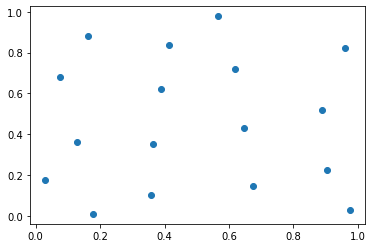

TypeError: Cannot construct a dtype from an array

In [16]:
from astropy.constants import c, G, M_sun
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from sympy.geometry import Point, Circle
from sympy.plotting import plot
import poisson_disc as pd
import math

%matplotlib inline

UNIVERSE_SIZE = 100

NUMBER_OF_STARS = 20

distance_between_stars = 2.537 * u.lyr
distance_variance = 0.100 * u.lyr

# universe_pizel_length = distance_between_stars / 25
distance_between_stars_in_pixels = 20
universe_pixel_length = distance_between_stars / distance_between_stars_in_pixels

# newton gravitational force
def newton_gravitational_force(mass1, mass2, distance):
    return G * mass1 * mass2 / (distance**2)

def newton_acceleration(force, mass):
    return force / mass

def force_vector(x1, y1, mass1, x2, y2, mass2):
    distance = math.sqrt((x2-x1)**2 + (y2-y1)**2)
    force = newton_gravitational_force(mass1, mass2, distance)
    vector = [x2-x1, y2-y1]
    normal = [vector[1]/distance, -vector[0]/distance]
    return [normal[0]*force, normal[1]*force]

def create_universe_matrix():
    return np.zeros((UNIVERSE_SIZE, UNIVERSE_SIZE))

universe = create_universe_matrix()
stars = []

def generate_stars(n=10):
    return pd.Bridson_sampling(radius=distance_between_stars_in_pixels/UNIVERSE_SIZE)

stars = generate_stars(NUMBER_OF_STARS)
print(stars)
plt.scatter(stars[:,0], stars[:,1])
# plt.colorbar()
plt.show()
# list(zip(*universe.nonzero()))

acceleration_vectors = np.arange(stars.shape[0]) *u.N
acceleration_vectors = np.ndarray(stars.shape, acceleration_vectors)
for i, star in enumerate(stars):
    for j, other_star in enumerate(stars):
        if i != j:
            vector = force_vector(star[0], star[1], M_sun, other_star[0], other_star[1], M_sun)
            acceleration_vectors[i] += vector

acceleration_vectors
# stars.shape



    




